In [1]:
import mlflow
import os
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

from pickle import dump

from scripts.Preprocessing import Preprocessing
from scripts.BinaryClassificationTraining import BinaryClassificationTraining

from scripts.config import (year_month_train, 
    input_data_path_train,
    seed)

In [2]:
local_path_save = './local_artifacts_tmp/03_Classification_Baseline/'
year_month = year_month_train
input_data_path = input_data_path_train

### MLFlow setting

In [3]:
if not os.path.exists(local_path_save):
    os.makedirs(local_path_save)

#save all metadata in a sqlite db. Artifacts will be saved on local folder ./mlflow    
mlflow.set_tracking_uri("sqlite:///mlflow.db")

# Name of the experiment
exp_name = "03 - Classification Baseline"
# set up MlFlow axperiment
experiment_id = mlflow.set_experiment(exp_name)

### Experiments

In [4]:
run_name = 'base'

In [5]:
baseline_classification_training = BinaryClassificationTraining(
    input_data_path,
    local_path_save,
    year_month,
    'baseline_classification')

In [6]:
prepr = Preprocessing(input_data_path_train, task_type='classification')
X, Y = prepr.read_dataframe(request_tgt=True)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=seed)

In [7]:
baseline_classification_training.calculate_classification_baseline(Y_train=Y_train, Y_test=Y_test, run_name=run_name)

/Users/davideposillipo/.pyenv/versions/3.10.9/envs/mlops/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/davideposillipo/.pyenv/versions/3.10.9/envs/mlops/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'loss': 0.5, 'status': 'ok'}

<AxesSubplot:>

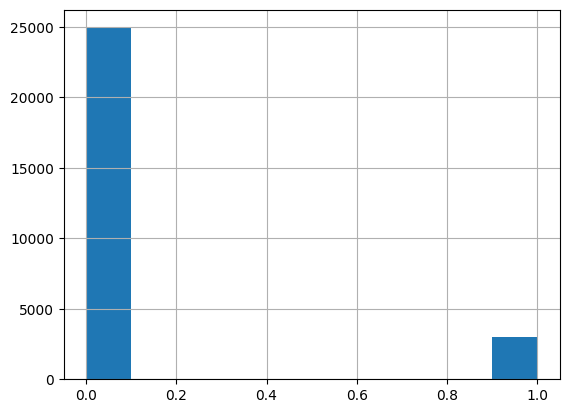

In [8]:
Y.hist()